# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [2]:
data = pd.read_csv('loan_data_2007_2014.csv')

# EXPLORE THE DATA

- Looking the Data Type
- Null Numbers
- Unique Values
- Data Head

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
data.sample(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
106584,106584,5197194,6519553,9125,9125,9125.0,36 months,10.64,297.19,B,B2,Great Southern Bank,2 years,RENT,28000.0,Not Verified,Aug-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/30/13 > I am using it t...,debt_consolidation,credit card,657xx,MO,22.63,0.0,Feb-00,0.0,NaN,NaN,8.0,0.0,15788,79.3,17.0,f,0.00,0.00,4156.58,4156.58,3205.76,950.82,0.0,0.0,0.0,Oct-14,297.19,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,19281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19900.0,NaN,NaN,NaN
364470,364470,16472047,18554525,13150,13150,13150.0,60 months,16.99,326.75,D,D3,Marketing Developement,4 years,RENT,50000.0,Source Verified,Jun-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,852xx,AZ,23.50,0.0,Oct-05,0.0,NaN,NaN,12.0,0.0,9379,63.4,16.0,w,10109.97,10109.97,6208.25,6208.25,3040.03,3168.22,0.0,0.0,0.0,Jan-16,326.75,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14800.0,NaN,NaN,NaN


In [5]:
print(data['member_id'].nunique())
print(data['id'].nunique())

466285
466285


We can see that there are no duplicated data based on `id` & `member_id` columns, it means that each row represents one individual. <br> <br>

The dataset contains **466285** rows and **75** columns. We can't say that it is a small dataset, we need to check the data carefully, here are some detail explanation about the data: <br> <br>
`id` : A unique LC assigned ID for the loan listing. <br>
`member_id` : A unique LC assigned Id for the borrower member.<br>
`loan_amnt` : Last month payment was received<br>
`funded_amnt` : The total amount committed to that loan at that point in time.<br>
`funded_amnt_inv` : <br>
`term` : The number of payments on the loan. Values are in months and can be either 36 or 60.<br>
`int_rate` : Interest Rate on the loan.<br>
`installment` : The monthly payment owed by the borrower if the loan originates.<br>
`grade` : LC assigned loan grade.<br>
`sub_grade` : LC assigned loan subgrade.<br>
`emp_title` : The job title supplied by the Borrower when applying for the loan.<br>
`emp_length` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.<br>
`home_ownership` : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.<br>
`annual_inc` : The self-reported annual income provided by the borrower during registration.<br>
`verification_status` : Indicates if the borrowers' joint income was verified by LC, not verified, or if the income source was verified.<br>
`issue_d` : The month which the loan was funded.<br>
`loan_status` : Current status of the loan.<br>
`pymnt_plan` : Payment plan.<br>
`url` : URL for the LC page with listing data.<br>
`desc` : Loan description provided by the borrower.<br>
`purpose` : A category provided by the borrower for the loan request.<br>
`title` : The loan title provided by the borrower.<br>
`zip_code` : The first 3 numbers of the zip code provided by the borrower in the loan application.<br>
`addr_state` : The state provided by the borrower in the loan application.<br>
`dti` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.<br>
`delinq_2yrs` : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.<br>
`earliest_cr_line` : The date the borrower's earliest reported credit line was opened.<br>
`inq_last_6mths` : Number of credit inquiries in past 6 months.<br>
`mths_since_last_delinq` : The number of months since the borrower's last delinquency.<br>
`mths_since_last_record` : The number of months since the last public record.<br>
`open_acc` : The number of open credit lines in the borrower's credit file.<br>
`pub_rec` : Number of derogatory public records.<br>
`revol_bal` : Total credit revolving balance.<br>
`revol_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.<br>
`total_acc` : The total number of credit lines currently in the borrower's credit file.<br>
`initial_list_status` : The initial listing status of the loan. Possible values are – Whole, Fractional.<br>
`out_prncp` : Remaining outstanding principal for total amount funded.<br>
`out_prncp_inv` : Remaining outstanding principal for portion of total amount funded by investors.<br>
`total_pymnt` : Payments received to date for total amount funded.<br>
`total_pymnt_inv` : Payments received to date for portion of total amount funded by investors.<br>
`total_rec_prncp` : Principal received to date.<br>
`total_rec_int` : Interest received to date.<br>
`total_rec_late_fee` : Late fees received to date.<br>
`recoveries` : Indicates if a payment plan has been put in place for the loan.<br>
`collection_recovery_fee` : post charge off collection fee.<br>
`last_pymnt_d` : Last month payment was received.<br>
`last_pymnt_amnt` : Last total payment amount received.<br>
`next_pymnt_d` : Next scheduled payment date.<br>
`last_credit_pull_d` : Last credit pull date.<br>
`collections_12_mths_ex_med` : Number of collections in 12 months excluding medical collections.<br>
`mths_since_last_major_derog` : Months since most recent 90-day or worse rating.<br>
`policy_code` : publicly available policy_code=1.<br>
`application_type` : Indicates whether the loan is an individual application or a joint application with two co-borrowers.<br>
`annual_inc_joint` : The combined self-reported annual income provided by the co-borrowers during registration.<br>
`dti_joint` : A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.<br>
`verification_status_joint` : Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified.<br>
`acc_now_delinq` : The number of accounts on which the borrower is now delinquent.<br>
`tot_coll_amt` : Total collection amounts ever owed.<br>
`tot_cur_bal` : Total current balance of all accounts.<br>
`open_acc_6m` : Number of open trades in last 6 months.<br>
`open_il_6m` : Number of installment accounts opened in past 6 months.<br>
`open_il_12m` : Number of installment accounts opened in past 12 months.<br>
`open_il_24m` : Number of installment accounts opened in past 24 months.<br>
`mths_since_rcnt_il` : Months since most recent installment accounts opened.<br>
`total_bal_il` : Total current balance of all installment accounts.<br>
`il_util` : Ratio of total current balance to high credit/credit limit on all install acct.<br>
`open_rv_12m` : Number of revolving trades opened in past 12 months.<br>
`open_rv_24m` : Number of revolving trades opened in past 24 months.<br>
`max_bal_bc` : Maximum current balance owed on all revolving accounts.<br>
`all_util` : Balance to credit limit on all trades.<br>
`total_rev_hi_lim` : Total revolving high credit/credit limit.<br>
`inq_fi` : Number of personal finance inquiries.<br>
`total_cu_tl` : Number of finance trades.<br>
`inq_last_12m` : Number of credit inquiries in past 12 months.<br>

The next step is drop the useless features, such as unique id, free text, etc. <br>

Drop column `Unnamed: 0` which is a copy of an index.<br>
Drop the columns having > 50% missing values. (columns with 0 unique value are also columns that have 100% missing value). <br>
Drop column `application_type` and `policy_code` (it only have 1 unique value).<br>
Drop identifier columns: `id`, `member_id`, `title`, `emp_title`, `url`, `zip_code`, `desc` (it can not be used in building model).<br>
Drop `sub_grade`, it contains the same information as the grade columns.<br>
Drop all null columns: `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`, `total_cu_tl`, `inq_last_12m`.

In [6]:
drop_col = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'

    # 1 unique value
    , 'application_type'
    , 'policy_code'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'Unnamed: 0'
    
    # expert judgment
    , 'sub_grade'
]

# drop null columns because it contains nothing
data = data.drop(drop_col, axis=1)

# DEFINE TARGET

In this credit risk modeling project, the main objective is to make predictions about an individual's ability to make payments on a given loan/credit. Therefore, the target variable used must reflect individual abilities in this regard. <br> <br>

In this dataset, the variable `loan_status` is a variable that can be used as a target variable because it reflects the performance of each individual in making payments on loans/loans so far.

In [7]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

We can see that `loan_status` variables have many values: <br> <br>

`Current` : means current payment.<br>
`Fully Paid` : means the payment is full.<br>
`Charged Off` : means the payment is jammed so it is written off.<br>
`Late` : means late payment.<br>
`In Grace Period` : means in a grace period or in warning.<br>
`Default` : means the payment is stuck.

From the definition above, each individual can be marked whether they are a `bad loan` (bad borrower) or a `good loan` (good borrower). <br>

The definition of bad and good loans can sometimes be different depending on business needs. In this example, I'm using overdue payments of more than 30 days and worse as markers of bad loans.

In [8]:
# create target column from loan status
# define values
good_loans = ['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)'
              'Does not meet the credit policy. Status:Fully Paid']

# create new column to classify ending
data['good_bad_loan'] = np.where(data['loan_status'].isin(good_loans), 1, 0)

In [9]:
data['good_bad_loan'].value_counts(normalize=True)*100

1    88.381784
0    11.618216
Name: good_bad_loan, dtype: float64

After flagging bad/good loans, it can be seen that the number of individuals marked as bad loans is far less than good loans. This causes this problem to become an imbalanced dataset problem. <br>

Don't forget to drop `loan_status` column.

In [10]:
data.drop('loan_status', axis=1, inplace=True)

# PRE PROCESSING

## DATA CLEANING

### Data Leakage

In Data Science we predict the data before (in this case) we invest the loan, not after. *I can predict with 100% accuracy if a football match is already ended*. <br>
This kind of case is called **Data Leakage**. We won't know if there'll be recovery fee, or if the outstanding principal will be 0 or not before the loan is concluded. We won't get any of those data before we invest in the loan. If we built our model using data with Data Leakages, our model will be of no use in production. <br>
So, we'll drop those columns that contain Data Leakage and we'll only keep the column with data that can be obtained before the loan is invested in.

In [11]:
leakage_col = ['issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

data.drop(columns=leakage_col, axis=1, inplace=True)

In [12]:
# check duplicated data suspect based on common sense
data[['loan_amnt','funded_amnt','funded_amnt_inv','grade','purpose','title']]

,loan_amnt,funded_amnt,funded_amnt_inv,grade,purpose,title
0,5000,5000,4975.0,B,credit_card,Computer
1,2500,2500,2500.0,C,car,bike
2,2400,2400,2400.0,C,small_business,real estate business
3,10000,10000,10000.0,C,other,personel
4,3000,3000,3000.0,B,other,Personal
...,...,...,...,...,...,...
466280,18400,18400,18400.0,C,debt_consolidation,Debt consolidation
466281,22000,22000,22000.0,D,debt_consolidation,Debt consolidation
466282,20700,20700,20700.0,D,debt_consolidation,Debt consolidation
466283,2000,2000,2000.0,A,credit_card,Credit card refinancing


Columns like `loan_amnt`, `funded_amnt`, and `funded_amnt_inv` looks similar, so we can remove 2 of these.

In [13]:
drop_col = ['funded_amnt', 'funded_amnt_inv']

data.drop(columns=drop_col, axis=1, inplace=True)

### Missing Value Checking

In [14]:
# get a list of columns that have more than 50% null values
na_values = data.isnull().mean()
na_values[na_values>0.5]

mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
dtype: float64

As we can see those columns above are quietly useless. The first three columns contains nulls more than 50%, it means that if we fill the null with mean/median/mode of course it makes the data not valid, so we can remove it.

In [15]:
# drop useless columns
drop_col = ['mths_since_last_delinq','mths_since_last_record', 'mths_since_last_major_derog']

data.drop(columns=drop_col, axis=1, inplace=True)

In [16]:
na_num = data.select_dtypes(exclude=['object']).isnull().sum()
na_num

loan_amnt                         0
int_rate                          0
installment                       0
annual_inc                        4
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim              70276
good_bad_loan                     0
dtype: int64

Columns like `tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim` contains many nulls with the same amount, kinda suspicious that we need to see more.

In [17]:
col = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# pivot table aggregated by mean
print(pd.pivot_table(data, index = 'good_bad_loan', values = col))

# pivot table aggregated by max value
print(pd.pivot_table(data, index = 'good_bad_loan', values = col, aggfunc = np.max))

               tot_coll_amt    tot_cur_bal  total_rev_hi_lim
good_bad_loan                                               
0                141.355723  116108.175291      26256.733754
1                197.790590  141439.715891      30858.289391
               tot_coll_amt  tot_cur_bal  total_rev_hi_lim
good_bad_loan                                             
0                   95806.0    3437283.0         1998700.0
1                 9152545.0    8000078.0         9999999.0


In [18]:
data[col].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.919135e+02,1.388017e+05,3.037909e+04
std,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.861800e+04,1.350000e+04
50%,0.000000e+00,8.153900e+04,2.280000e+04
75%,0.000000e+00,2.089530e+05,3.790000e+04
max,9.152545e+06,8.000078e+06,9.999999e+06


<AxesSubplot:xlabel='tot_coll_amt', ylabel='Density'>

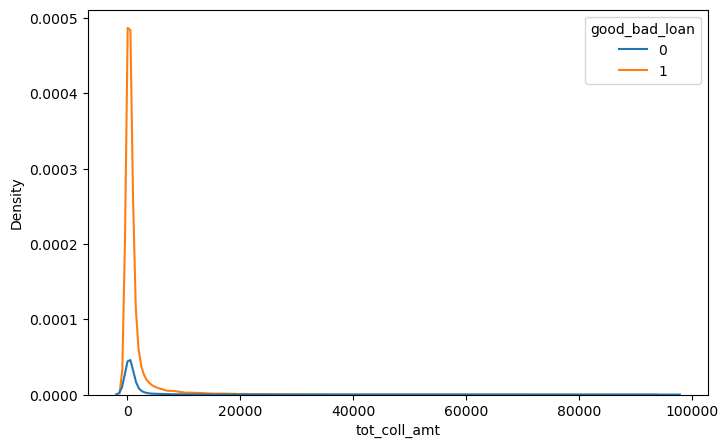

In [19]:
plt.figure(figsize=(8,5))

# I use "> 0" because 75% of the data is 0, so the plot below just use < 25% of the data
sns.kdeplot(data = data[(data['tot_coll_amt'] < 100000) & (data['tot_coll_amt'] > 0)], x='tot_coll_amt', hue='good_bad_loan')

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

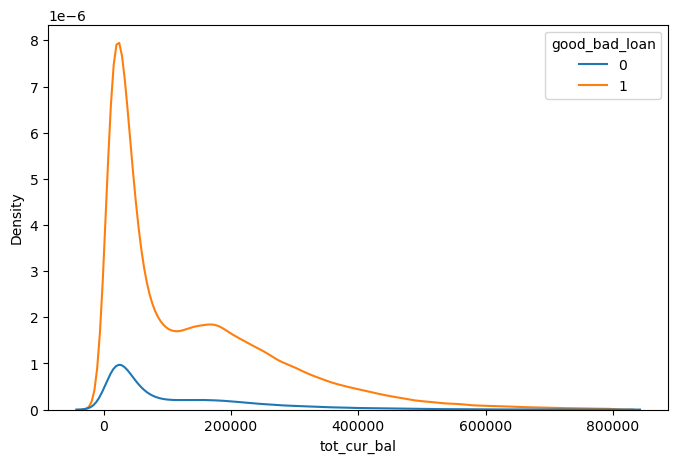

In [20]:
plt.figure(figsize=(8,5))
sns.kdeplot(data = data[data['tot_cur_bal'] < 800000], x='tot_cur_bal', hue='good_bad_loan')

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

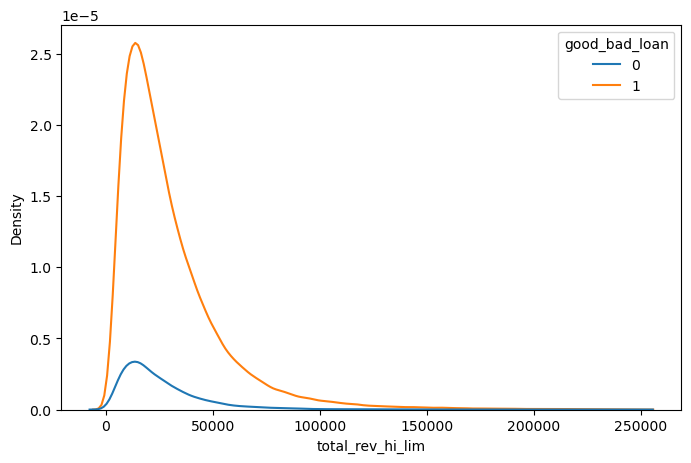

In [21]:
plt.figure(figsize=(8,5))
sns.kdeplot(data = data[data['total_rev_hi_lim'] < 250000], x='total_rev_hi_lim', hue='good_bad_loan')

From the data above, we get some conclusion:
- 75% of tot_coll_amt is 0
- Based on the distribution plot, there are no clear separator between good and risky loan for each values of the columns
- We'll have to sacrifice nearly ~50k rows of data if we want to use them
<br>For the verdict, we decided not to use the columns for the time being.

In [22]:
drop_col = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

data.drop(drop_col, inplace=True, axis = 1)

Data with small unique values

In [23]:
# filter data with less than 10 unique values
data.nunique()[data.nunique() < 10].sort_values()

term                          2
initial_list_status           2
good_bad_loan                 2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    9
dtype: int64

In [24]:
def risk_pct_chart(x):
    ratio = (data.groupby(x)['good_bad_loan'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky_pct') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['good_bad_loan'] == 0], x=x, y='risky_pct')
    plt.title(x)
    plt.show()

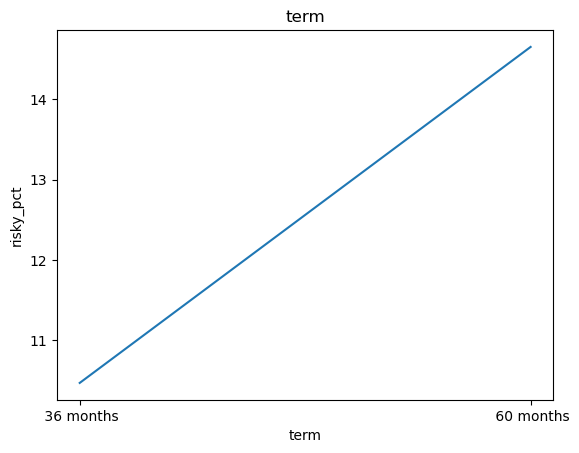

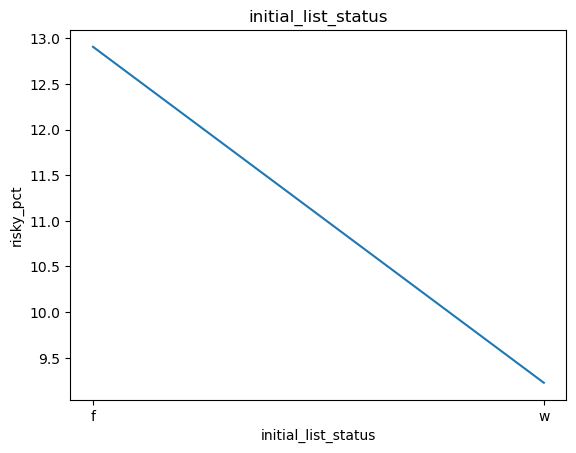

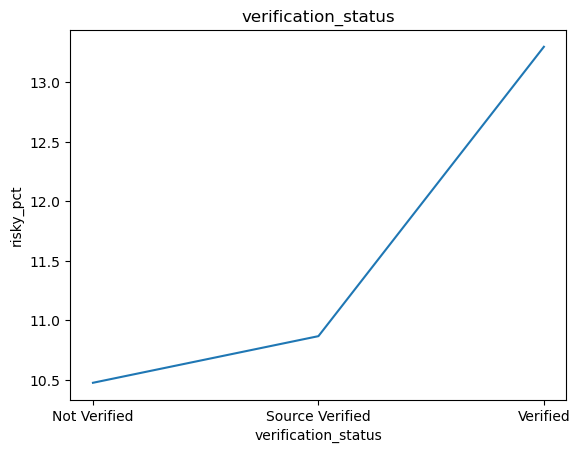

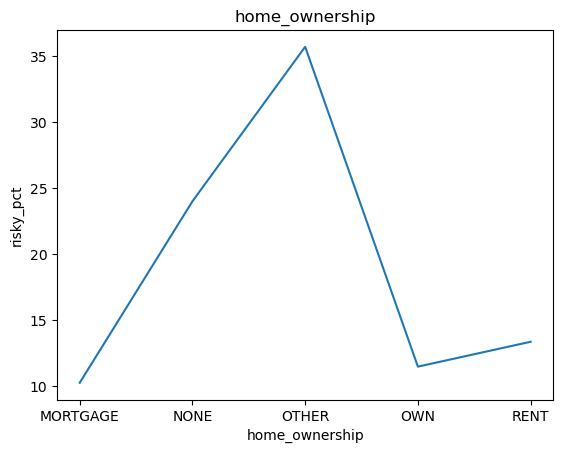

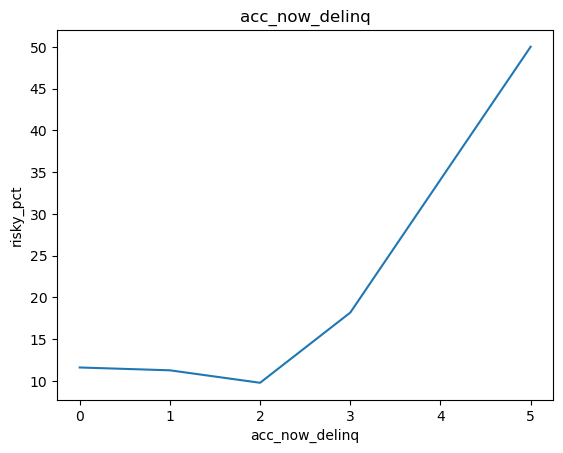

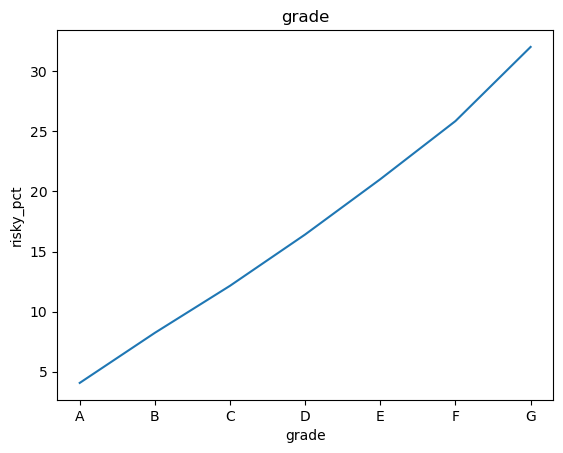

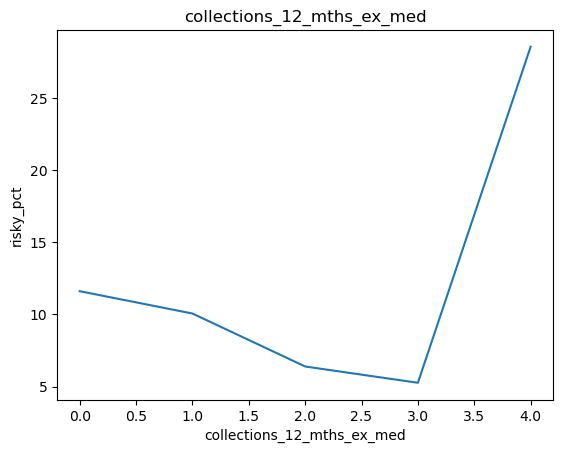

In [25]:
small_unique = ['term', 'initial_list_status', 'verification_status', 'home_ownership', 'acc_now_delinq', 'grade', 'collections_12_mths_ex_med']

for col in small_unique:
  risk_pct_chart(col)

columns with significant change of good x bad ratio between values:
- term
- Grade
- acc_now_delinq
<br>

columns with minor change of ratio between values:

- home ownership
- verification status
- initial_list_status
<br>

But they're all good though, and we want to keep them, because at least they contributing something, either it's minor or major.

## FEATURE ENGINEERING

In this step, we will modify some features into format that can be used in modeling.

### 1. emp_length

Modify the `emp_length` column, remove the 'year' words, and some non-numeric character such as '<' and '+'.

In [26]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

data['emp_length'] = data['emp_length'].map(emp_map).fillna('0').astype(int)
data['emp_length'].value_counts()

10    150049
0      57273
2      41373
3      36596
5      30774
1      29622
4      28023
7      26180
6      26112
8      22395
9      17888
Name: emp_length, dtype: int64

### 2. term

Modify the `term` column, remove 'months' words.

In [27]:
data['term'] = data['term'].str.replace(' months', '')

In [28]:
data['term'] = data['term'].astype(int)
data['term'].value_counts()

36    337953
60    128332
Name: term, dtype: int64

### 3. earliest_cr_line

Modify `earliest_cr_line` from month-year format to calculate how much time has passed since that time. To do this, it is common to use reference date = today. However, because this dataset is a dataset for 2007-2014, it would be more relevant to use a reference date around 2017. In this example, I used 2017-12-01 as the reference date.

In [29]:
data['earliest_cr_line'].head(2)

0    Jan-85
1    Apr-99
Name: earliest_cr_line, dtype: object

In [30]:
# change the datetime format into year-month-day, ex: 1985-01-01
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(2)

0   1985-01-01
1   1999-04-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [31]:
# change the format from datetime into numeric for each individu
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

There's something weird with the negative value, we should looking for more.

In [33]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


It turns out that the negative value appears because the Python function incorrectly interprets the year 62 to be 2062, when it should be 1962. It happened because as I know the first date in Python is 1970, so in my opinion that Python can't detect that 1962 year.<br>

To resolve this, further preprocessing can be done if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since here I know that negative values mean old data (1900s), it still makes sense that I change those values to the largest value.

In [34]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [35]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### 4. last_credit_pull_d

The modification process in `last_credit_pull_d` is the same as in `earliest_cr_line`.

In [36]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [37]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [38]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [44]:
data.select_dtypes(include=['object']).nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
dtype: int64

`emp_title` and `title` contain too many unique values. For the 'title' related to 'purpose', and 'emp_title' is individual data, so I think we can remove them.

In [46]:
drop_col = ['emp_title', 'title']

data.drop(drop_col, axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

## Data Target Distribution

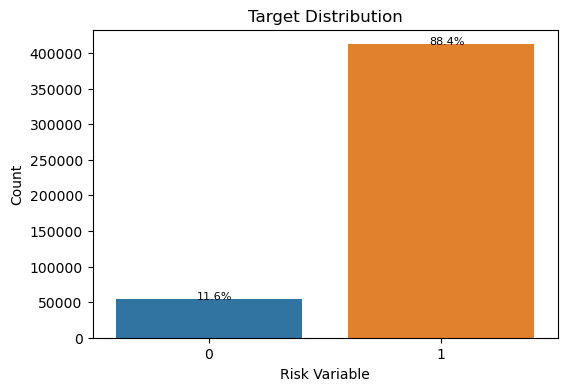

In [42]:
# countplot for target variable
plt.figure(figsize=(6,4))
ax = sns.countplot(x='good_bad_loan', data=data)
plt.title('Target Distribution')
plt.xlabel('Risk Variable')
plt.ylabel('Count')

total = float(len(data))
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2 - 0.05
  y = p.get_height()
  ax.annotate(percentage, (x, y), size=8)

plt.show()

In [47]:
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(exclude=['object'])

## Statistical Descriptive

In [48]:
categorical.describe()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
count,466285,466285,466285,466285,466285,466285
unique,7,6,3,14,50,2
top,B,MORTGAGE,Verified,debt_consolidation,CA,f
freq,136929,235875,168055,274195,71450,303005


In categorical data, we have 6 columns with each unique values.

In [49]:
numerical.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,good_bad_loan,mths_since_earliest_cr_line,mths_since_last_credit_pull_d
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466140.000000,466256.000000,466285.000000,466256.000000,466243.000000
mean,14317.277577,42.605334,13.829236,432.061201,5.723307,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,0.009085,0.004002,0.883818,242.385374,27.045588
std,8286.509164,10.719040,4.357587,243.485550,3.756084,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,0.108648,0.068637,0.320444,86.460310,9.636423
min,500.000000,36.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,73.000000,23.000000
25%,8000.000000,36.000000,10.990000,256.690000,2.000000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,1.000000,184.000000,23.000000
50%,12000.000000,36.000000,13.660000,379.890000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,0.000000,0.000000,1.000000,226.000000,23.000000
75%,20000.000000,60.000000,16.490000,566.580000,10.000000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,0.000000,0.000000,1.000000,285.000000,25.000000
max,35000.000000,60.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,20.000000,5.000000,1.000000,587.000000,127.000000


In numerical data, we have 19 columns.

## Univariate Analysis

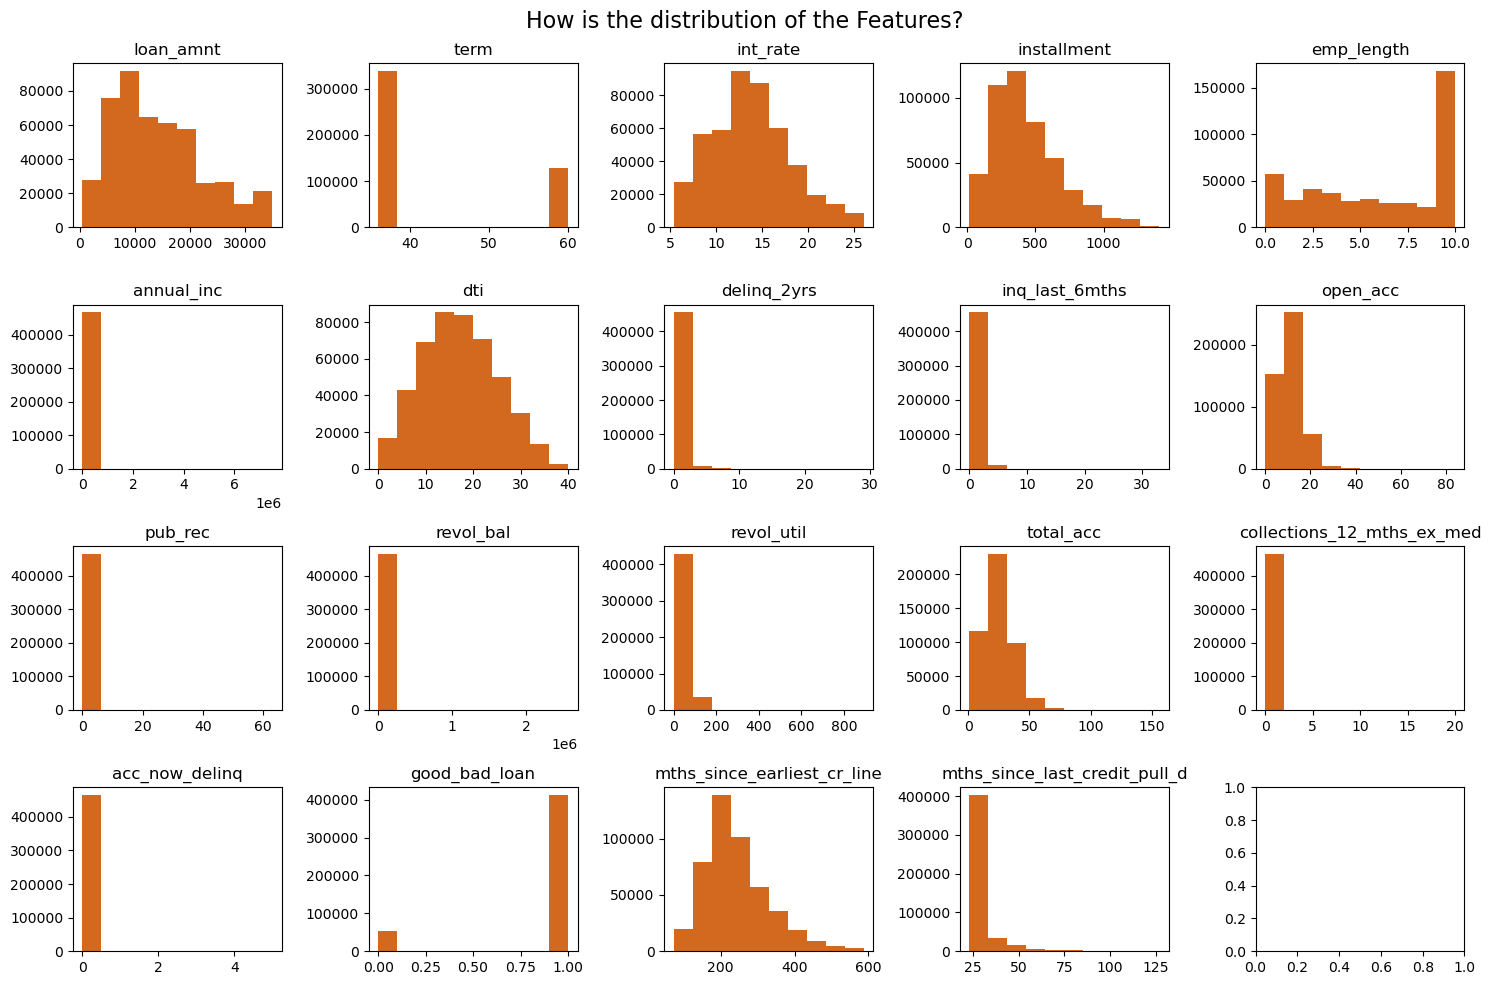

In [43]:
# numerical distribution

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

for idx, ax in enumerate(axs.flatten()):
    if idx < len(numerical.columns):
        ax.hist(numerical[numerical.columns[idx]], color='chocolate')
        ax.set_title(numerical.columns[idx])

plt.suptitle('How is the distribution of the Features?', size=16)
plt.tight_layout()
plt.show()

In [50]:
categorical.nunique()

grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
dtype: int64

Text(0.5, 1.05, 'How is the distribution of the feature?')

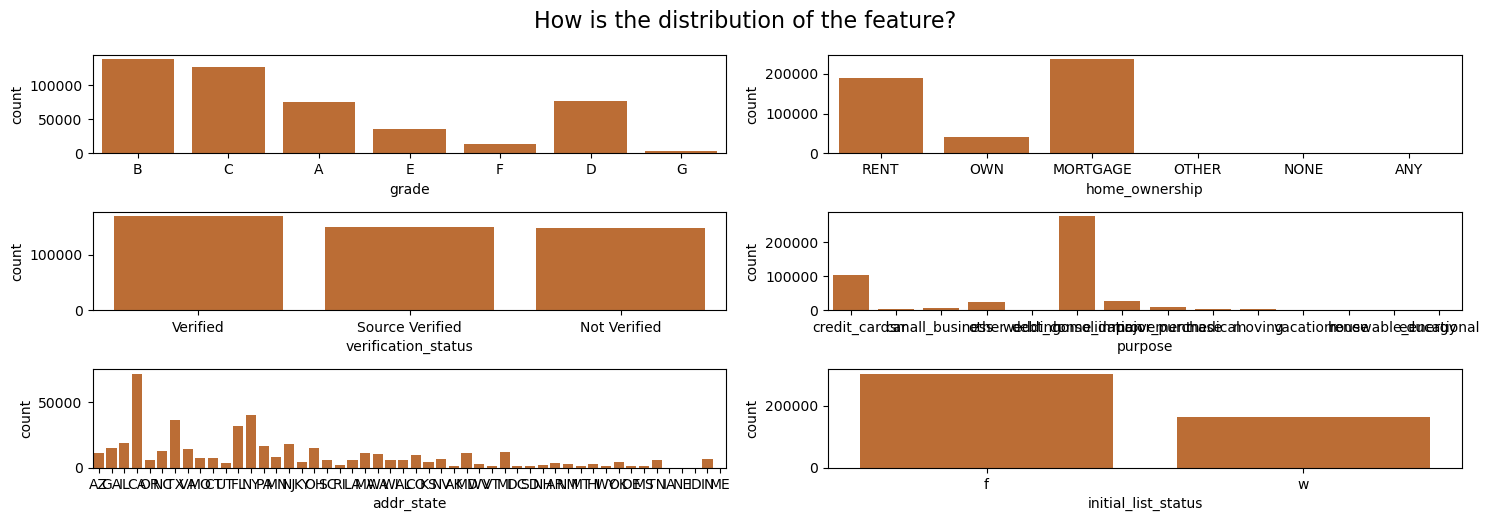

In [56]:
# categorical distribution

cats = ['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status']

plt.figure(figsize=(15,6))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(data[cats[i]], color='chocolate')
    plt.tight_layout()

plt.suptitle('How is the distribution of the feature?', y=1.05, size=16)

- Only small amount of numerical data are distributed normally.
- Some of the data contain outliers.
- In categorical, the data have various distribution for each.

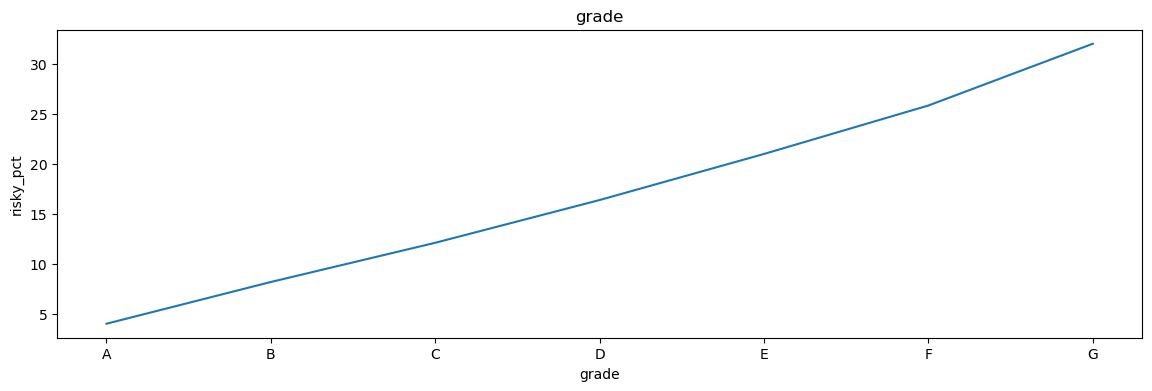

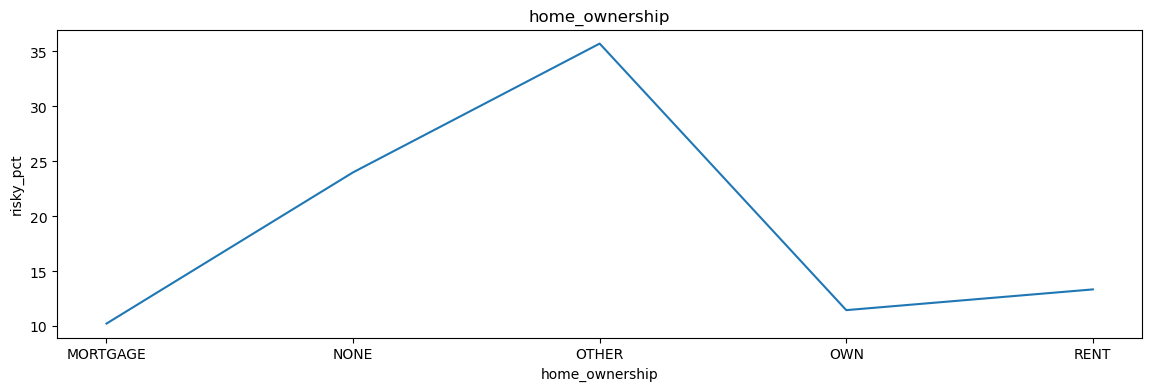

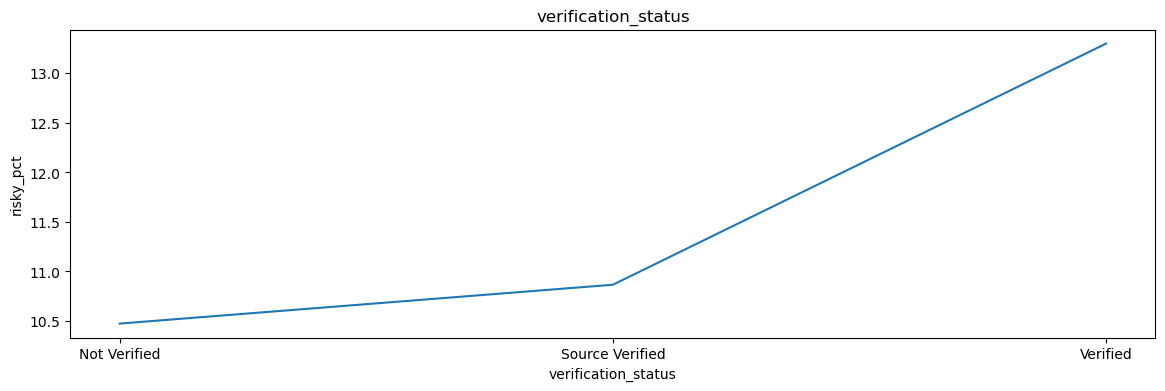

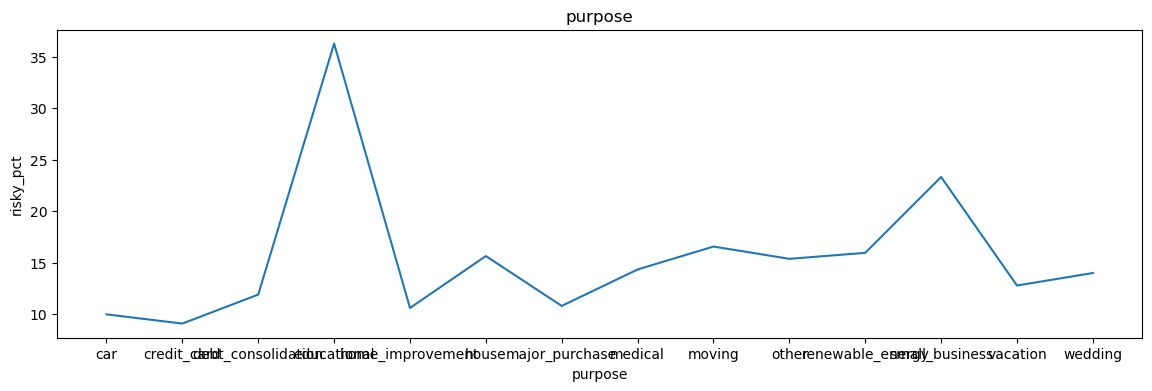

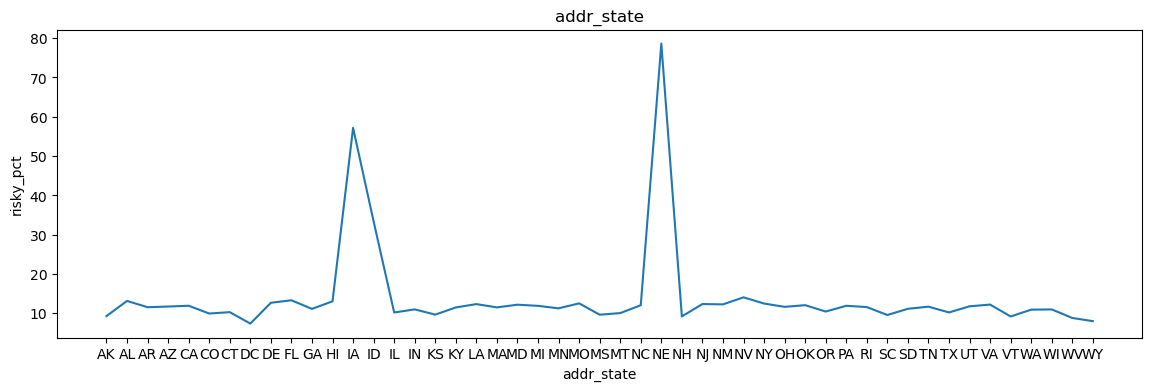

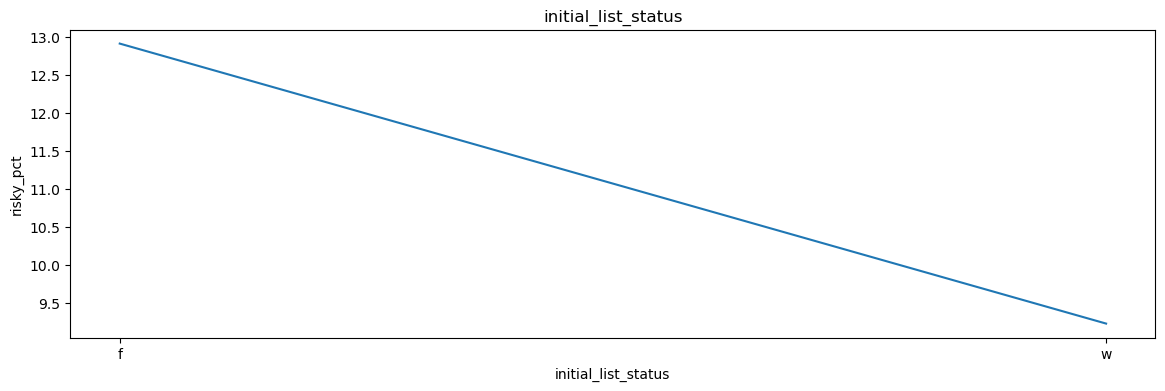

In [63]:
to_chart = categorical.columns

for col in to_chart:
    plt.figure(figsize=(14,4))
    risk_pct_chart(col)

From the chart above, we have conclusions:

- The lower the grade, the riskier the loan.
- `home_ownership` with `mortgage` and `own` have the lowest risk.
- In `verification_status`, `not verified` has the lowest risk.
- In `purpose`, `car` and `credit_card` have the lowest risk, and `educational` and `small_business` have the highest risk.
- For the states, they have varied risk.

## Multivariate Analysis

Text(0.4, 0.92, 'Correlation Heatmap')

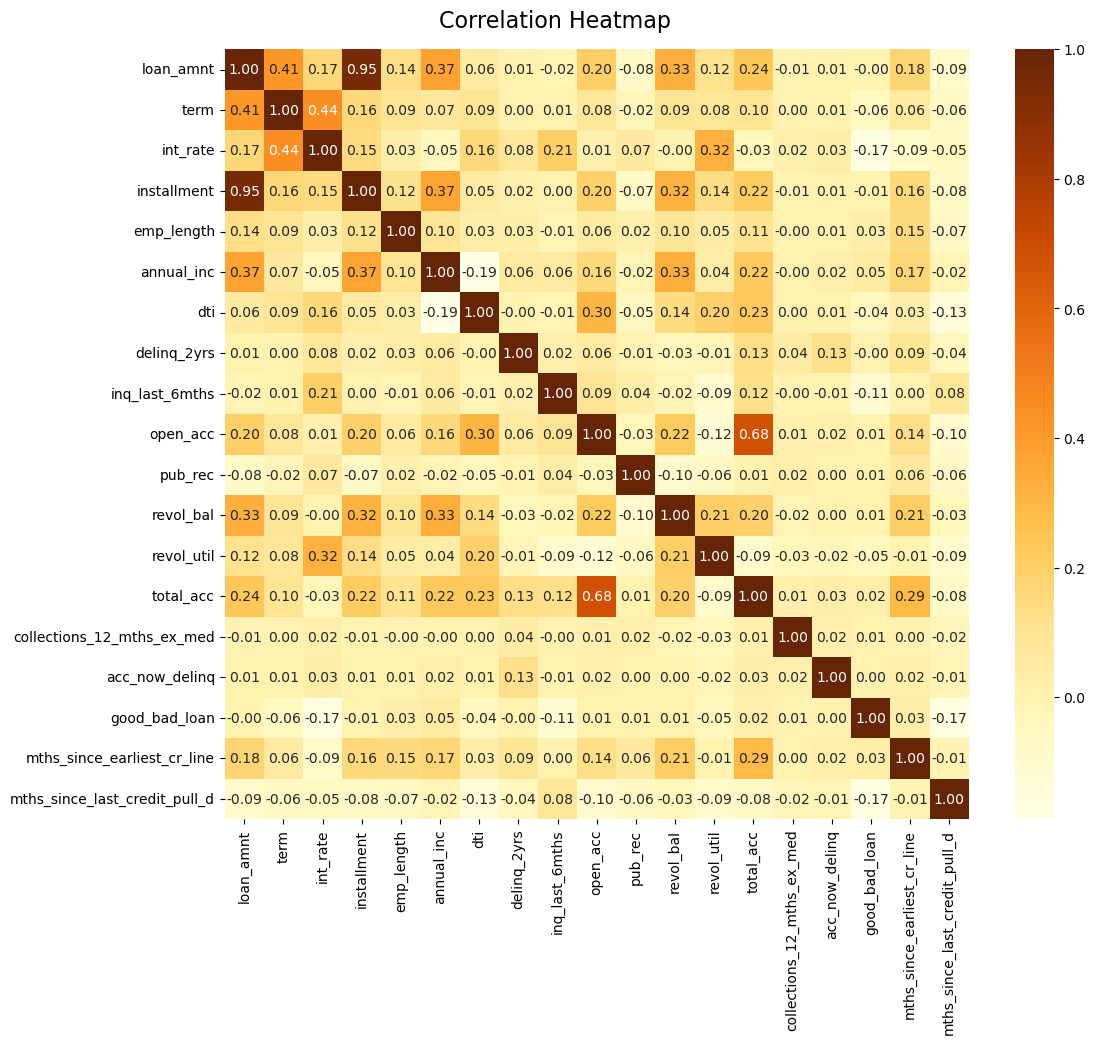

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.suptitle('Correlation Heatmap',x=0.4, y=0.92, size=16)
# plt.savefig('image/heatmap.png')

Here, if there are pairs of features that have a high correlation, only one will be taken. The correlation value used as a benchmark for high correlation is uncertain, generally the number 0.7 is used.

In [66]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [67]:
to_drop_hicorr

['installment']

In [68]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

## MISSING VALUE

In [70]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


revol_util                       0.072917
collections_12_mths_ex_med       0.031097
mths_since_last_credit_pull_d    0.009007
delinq_2yrs                      0.006219
inq_last_6mths                   0.006219
open_acc                         0.006219
pub_rec                          0.006219
total_acc                        0.006219
acc_now_delinq                   0.006219
mths_since_earliest_cr_line      0.006219
annual_inc                       0.000858
dtype: float64

### Missing Values Filling

In [80]:
pp = ['revol_util','collections_12_mths_ex_med','mths_since_last_credit_pull_d','delinq_2yrs',
     'inq_last_6mths','open_acc','pub_rec','total_acc','acc_now_delinq','mths_since_earliest_cr_line','annual_inc']

In [84]:
data[pp].describe()

,revol_util,collections_12_mths_ex_med,mths_since_last_credit_pull_d,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,mths_since_earliest_cr_line,annual_inc
count,465945.000000,466140.000000,466243.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662810e+05
mean,56.176947,0.009085,27.045588,0.284678,0.804745,11.187069,0.160564,25.064430,0.004002,242.385374,7.327738e+04
std,23.732628,0.108648,9.636423,0.797365,1.091598,4.987526,0.510863,11.600141,0.068637,86.460310,5.496357e+04
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,73.000000,1.896000e+03
25%,39.200000,0.000000,23.000000,0.000000,0.000000,8.000000,0.000000,17.000000,0.000000,184.000000,4.500000e+04
50%,57.600000,0.000000,23.000000,0.000000,0.000000,10.000000,0.000000,23.000000,0.000000,226.000000,6.300000e+04
75%,74.700000,0.000000,25.000000,0.000000,1.000000,14.000000,0.000000,32.000000,0.000000,285.000000,8.896000e+04
max,892.300000,20.000000,127.000000,29.000000,33.000000,84.000000,63.000000,156.000000,5.000000,587.000000,7.500000e+06


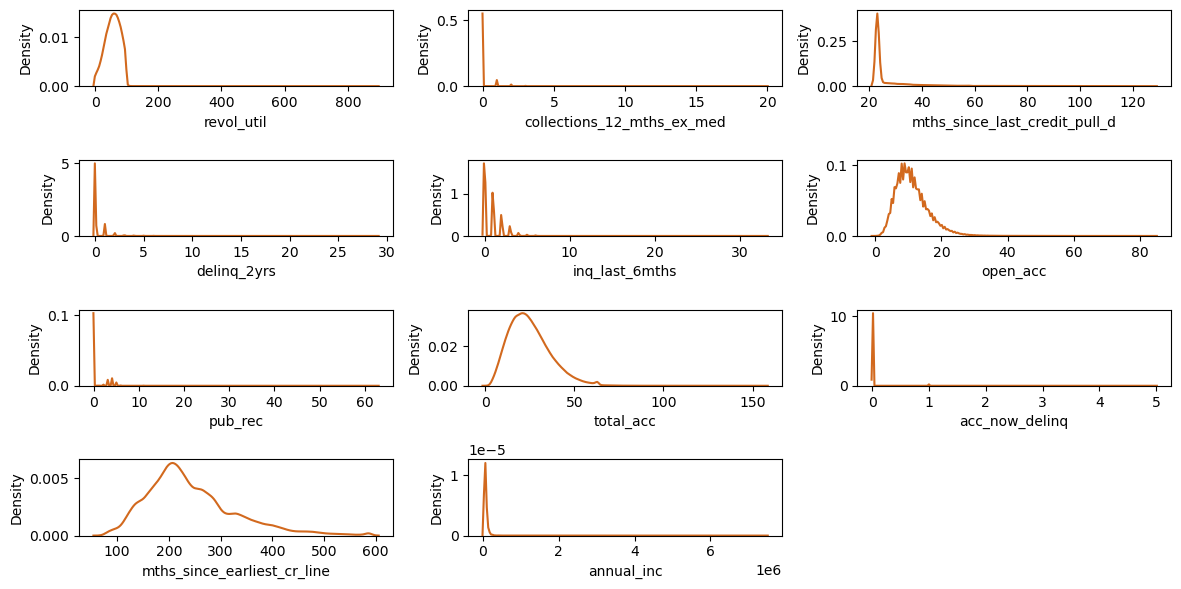

In [82]:
plt.figure(figsize=(12,6))
for i in range(0, len(pp)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=data[pp[i]], color='chocolate')
    plt.tight_layout()


In [85]:
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].median(), inplace=True)
data['mths_since_last_credit_pull_d'].fillna(data['mths_since_last_credit_pull_d'].median(), inplace=True)
data['delinq_2yrs'].fillna(data['delinq_2yrs'].median(), inplace=True)
data['inq_last_6mths'].fillna(data['inq_last_6mths'].median(), inplace=True)
data['open_acc'].fillna(data['open_acc'].median(), inplace=True)
data['pub_rec'].fillna(data['pub_rec'].median(), inplace=True)
data['total_acc'].fillna(data['total_acc'].median(), inplace=True)
data['acc_now_delinq'].fillna(data['acc_now_delinq'].median(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(data['mths_since_earliest_cr_line'].median(), inplace=True)
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)

# FEATURE SCALING AND TRANSFORMATION

## Feature Transforming

In [89]:
# transforming grade
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

data['grade'] = data['grade'].map(grade_map)

## One Hot Encoding

In [94]:
# one hot encoding
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

onehot = pd.get_dummies(categorical[categorical_cols])

In [101]:
onehot

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
466281,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
466282,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466283,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Standardization

In [126]:
numerical_cols = [col for col in data.select_dtypes(exclude='object').columns.tolist() if col not in ['good_bad_loan']]

In [127]:
# combine result of onehot and numerical columns to standarize them
to_std = pd.concat([onehot, data[numerical_cols]], axis=1)

In [128]:
to_std

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,mths_since_earliest_cr_line,mths_since_last_credit_pull_d
0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5000,36,10.65,2,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,395.0,23.0
1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2500,60,15.27,3,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,224.0,51.0
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2400,36,15.96,3,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,193.0,23.0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10000,36,13.49,3,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,262.0,35.0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3000,60,12.69,2,1,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0.0,0.0,263.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,18400,60,14.47,3,4,110000.0,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,0.0,0.0,176.0,23.0
466281,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,22000,60,19.97,4,10,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.0,0.0,246.0,23.0
466282,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,20700,60,16.99,4,7,46000.0,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,0.0,0.0,192.0,24.0
466283,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2000,36,7.90,1,3,83000.0,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.0,0.0,178.0,32.0


In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(to_std), columns=[to_std])

In [130]:
std.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,mths_since_earliest_cr_line,mths_since_last_credit_pull_d
0,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,-0.688639,1.332140,-0.108213,1.864605,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,6.521443,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-1.124392,-0.616225,-0.729587,-0.618831,1.138605,-0.896549,1.328632,-0.357012,0.178920,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.083608,-0.058307,1.765207,-0.419801
1,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,1.452140,-0.750672,9.241054,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,-0.153340,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,5.489769,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-1.426088,1.622784,0.330634,0.138524,-1.523744,-0.787386,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.083608,-0.058307,-0.212640,2.485953
2,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,1.464765,-0.688639,-0.750672,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,8.092507,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,-0.153340,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,4.904378,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.0

## Transformed Dataframe

Recombine the transformed columns

In [174]:
final_data = pd.concat([std, data[['good_bad_loan']]], axis=1).reset_index().drop('index', axis = 1)

In [175]:
final_data = std.copy()
final_data['good_bad_loan'] = data['good_bad_loan'].copy()

In [184]:
final_data.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,good_bad_loan
0,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,-0.688639,1.332140,-0.108213,1.864605,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,6.521443,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-1.124392,-0.616225,-0.729587,-0.618831,1.138605,-0.896549,1.328632,-0.357012,0.178920,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.083608,-0.058307,1.765207,-0.419801,1
1,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,1.452140,-0.750672,9.241054,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,-0.153340,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,5.489769,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-1.426088,1.622784,0.330634,0.138524,-1.523744,-0.787386,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.083608,-0.058307,-0.212640,2.485953,0
2,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,1.464765,-0.688639,-0.750672,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,8.092507,-0.073227,-0.071065,-0.051866,-0.112747,-0.086815,-0.153340,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,4.904378,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.113680,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151

# Model Training and Prediction

## Data Split

In [178]:
# define X and y variable
X = final_data.drop('good_bad_loan', axis = 1)
y = final_data['good_bad_loan']

In [179]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
X_train.shape, X_test.shape


((373028, 93), (93257, 93))

## Check Imbalance Data

<AxesSubplot:title={'center':'Good (1) vs Bad (0) Loans Balance'}, xlabel="('good_bad_loan',)">

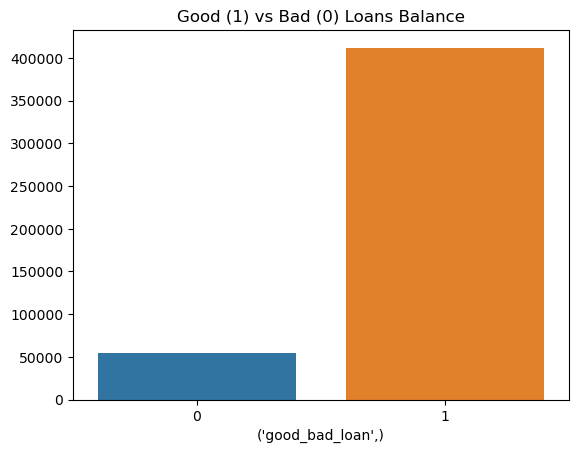

In [202]:
#check if class labels are balanced
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=final_data['good_bad_loan'].value_counts().index.get_level_values(0),y=final_data['good_bad_loan'].value_counts().values)

From the data above, data with good loan has much more than the bad loan. This data called imbalance, so we have to handle this first using oversampling.

In [203]:
from imblearn import over_sampling
X_over, y_over = over_sampling.SMOTE(random_state=123).fit_resample(X_train, y_train)

In [204]:
X_over.shape, y_over.shape

((659316, 93), (659316, 1))

## Modelling Data

In [221]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer, classification_report

### Logistic Regression

In [284]:
# using logistic regression model
lr = LogisticRegression()
lr.fit(X_over, y_over)

#predicting
y_preds = lr.predict(X_test)

#classification report
target_names = ['bad loan', 'good_loan']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    bad loan       0.20      0.64      0.31     10804
   good_loan       0.93      0.67      0.78     82453

    accuracy                           0.67     93257
   macro avg       0.57      0.65      0.54     93257
weighted avg       0.85      0.67      0.73     93257



### Decision Tree

In [227]:
# using logistic regression model
dt = DecisionTreeClassifier()
dt.fit(X_over, y_over)

#predicting
y_preds = dt.predict(X_test)

#classification report
target_names = ['bad loan', 'good_loan']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    bad loan       0.21      0.26      0.23     10804
   good_loan       0.90      0.87      0.89     82453

    accuracy                           0.80     93257
   macro avg       0.56      0.57      0.56     93257
weighted avg       0.82      0.80      0.81     93257



### XGBoost

In [228]:
# using logistic regression model
xgb = XGBClassifier()
xgb.fit(X_over, y_over)

#predicting
y_preds = xgb.predict(X_test)

#classification report
target_names = ['bad loan', 'good_loan']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    bad loan       0.61      0.09      0.16     10804
   good_loan       0.89      0.99      0.94     82453

    accuracy                           0.89     93257
   macro avg       0.75      0.54      0.55     93257
weighted avg       0.86      0.89      0.85     93257



For this project we will more focus in **precision** score, because in this case we need to suppress the number of **false positives** as small as possible. False positive is the number when the actual data is negative (in this case: bad loan), but our model predicted as positive (in this case: good loan). It means that if the actual is a borrower can't pay the debt, but our machine/system detect he/she can pay the debt. It can be dangerous if the number of false positive is big, because we let the bad borrower to use our service, in other words we can bankrupt if we don't get enough profit.

From the model training above, the best precision score is from **Logistic Regression** model. So, we choose Logistic Regression to get the ROC, AUROC and KS score.

### ROC Curve

In [285]:
y_hat_test_proba = lr.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
362514,1,0.532578,1
288564,1,0.455363,0
213591,1,0.384765,0
263083,1,0.585703,1
165001,1,0.784581,1


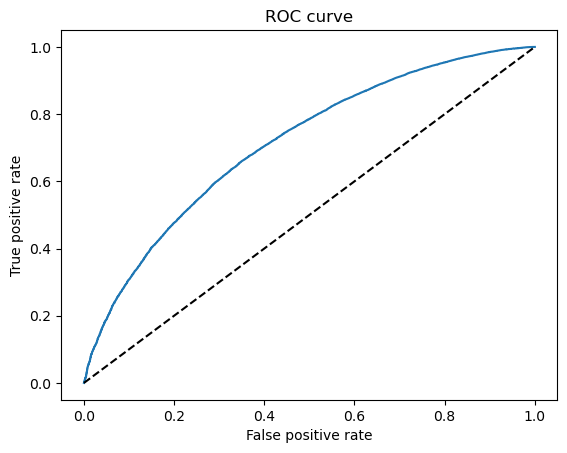

In [286]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

### Area Under ROC Curve

In [287]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.7128478841746708

### Precision-Recall Curve

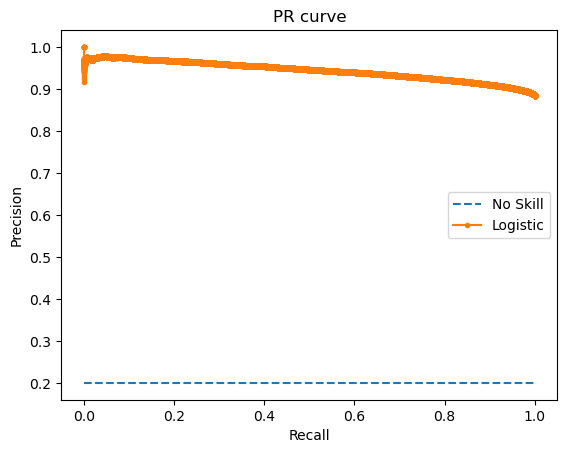

In [288]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

### Precision-Recall Score

In [289]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9434812859709639

### Kolmogorov-Smirnov

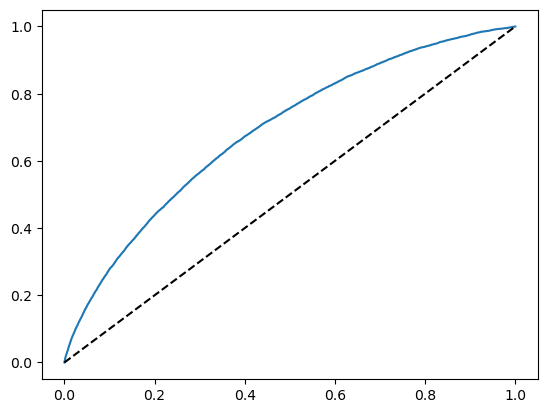

In [290]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

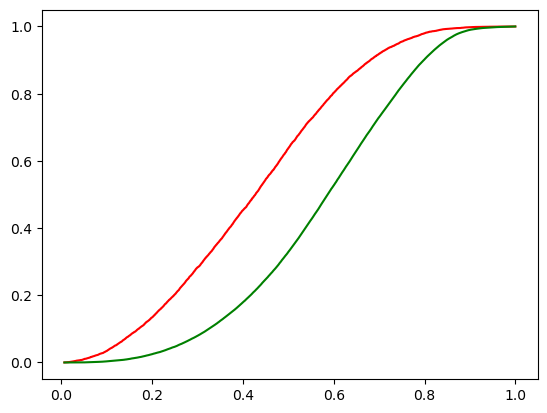

In [291]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [292]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.31025941795892265


### Confusion Matrix

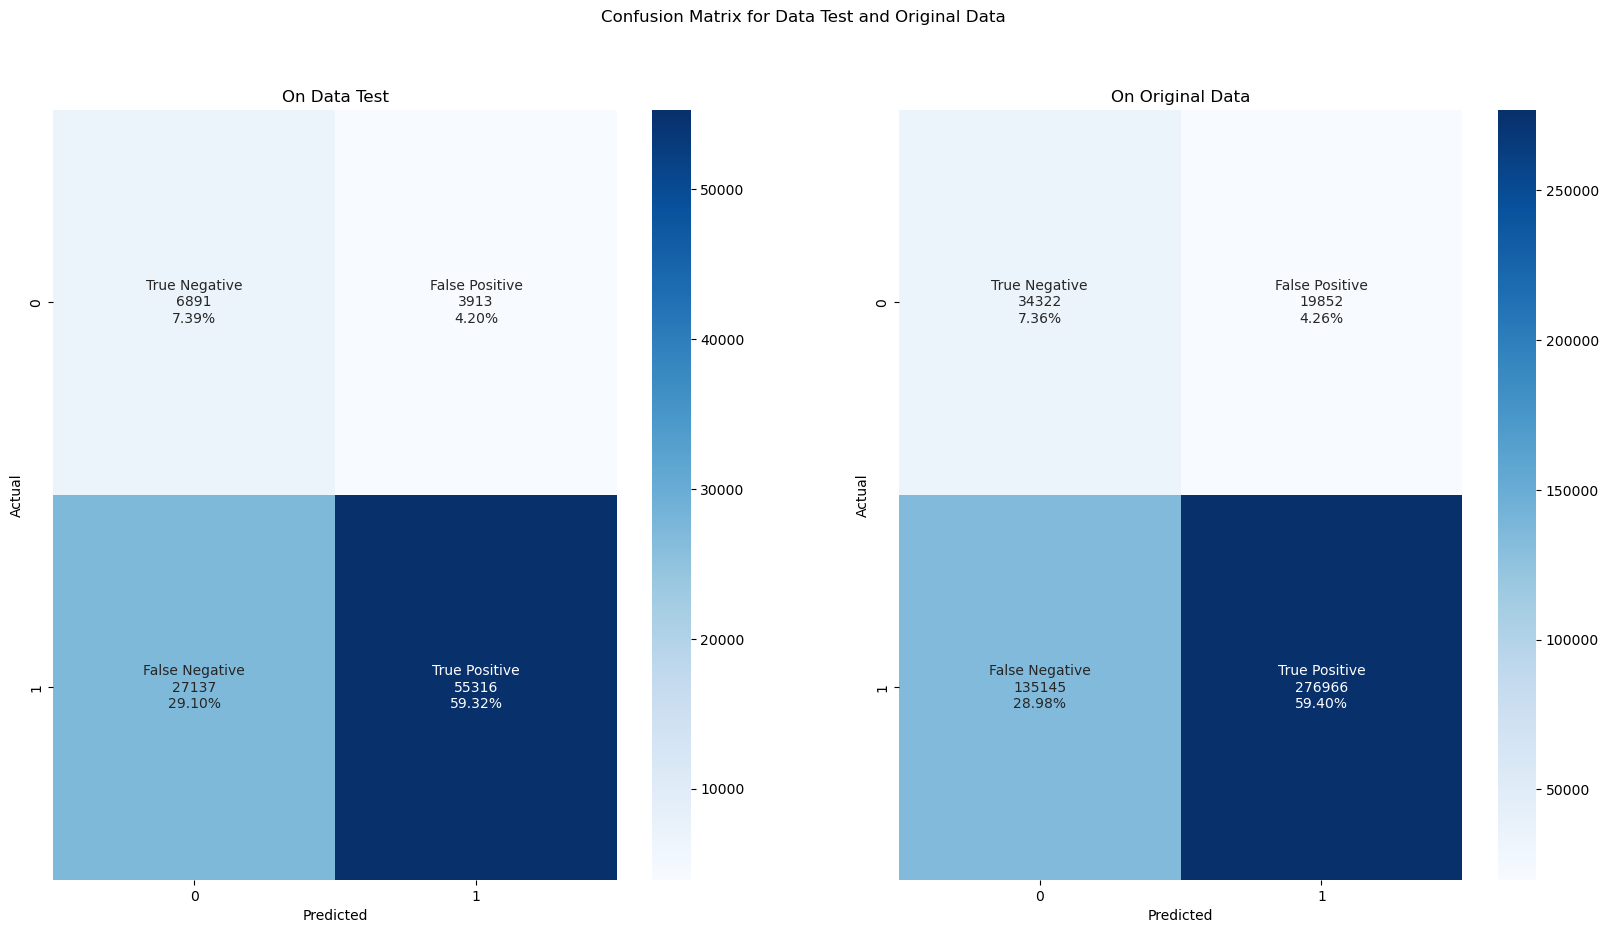

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute first confusion matrix
y_test_pred_xg1 = lr.predict(X_test)
cf_matrix1 = confusion_matrix(y_test, y_test_pred_xg1)

# Compute second confusion matrix
y_test_pred_xg2 = lr.predict(X)
cf_matrix2 = confusion_matrix(y, y_test_pred_xg2)

# Define labels for confusion matrices
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts1 = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)

group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot first confusion matrix
sns.heatmap(cf_matrix1, annot=labels1, fmt='', cmap='Blues', ax=axs[0])
axs[0].set_title('On Data Test')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Plot second confusion matrix
sns.heatmap(cf_matrix2, annot=labels2, fmt='', cmap='Blues', ax=axs[1])
axs[1].set_title('On Original Data')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# Add title for the whole plot
plt.suptitle('Confusion Matrix for Data Test and Original Data')

# Show the plot
plt.show()


From the confusion matrix on data test above, we highlight more in positive values, there are True Positive and False Positive. From the positive values or the predicted `good loan`, we have 6,6% data that are actually bad loan. It means that we predict **93,4%** that actually good loan.

On original data we have 6,7% data that are actually bad loan, and **93,3%** data that actually good loan.

### Hyperparameter Tuning

Do hyperparameter tuning on Logistic Regression model to get a better score.

In [259]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
hyperparameters = {
                    'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
                    'fit_intercept': [True, False],
                    'tol': [1e-4, 1e-5, 1e-6],
                    'max_iter': [100, 1000, 10000],
                    'class_weight': [None, 'balanced']
                    }

# Init
log = LogisticRegression(random_state=42)
log_tuned = RandomizedSearchCV(log, hyperparameters, cv=5, random_state=42, scoring= precision_score)
log_tuned.fit(X_over,y_over)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 1000, 10000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag', 'saga'],
                                        'tol': [0.0001, 1e-05, 1e-06]},
                   random_state=42,
                   scoring=<function precision_score at 0x000001C6811421F0>)

### Classification Report

In [260]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

y_train_pred_xg = log_tuned.predict(X_train)
y_test_pred_xg = log_tuned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('precision Score:', np.round(precision_score(y_train, y_train_pred_xg),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_xg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_xg))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('precision Score:', np.round(precision_score(y_test, y_test_pred_xg),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_xg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_xg))

TRAINING RESULT:
precision Score: 0.942
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.18      0.74      0.29     43370
           1       0.94      0.55      0.70    329658

    accuracy                           0.58    373028
   macro avg       0.56      0.65      0.49    373028
weighted avg       0.85      0.58      0.65    373028

Confussion Matrix ------------------------------------
[[ 32097  11273]
 [146835 182823]]


TESTING RESULT:
precision Score: 0.942
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.18      0.74      0.29     10804
           1       0.94      0.55      0.70     82453

    accuracy                           0.57     93257
   macro avg       0.56      0.65      0.49     93257
weighted avg       0.85      0.57      0.65     93257

Confussion Matrix ------------------------------------
[[ 8018  2

### Confusion Matrix

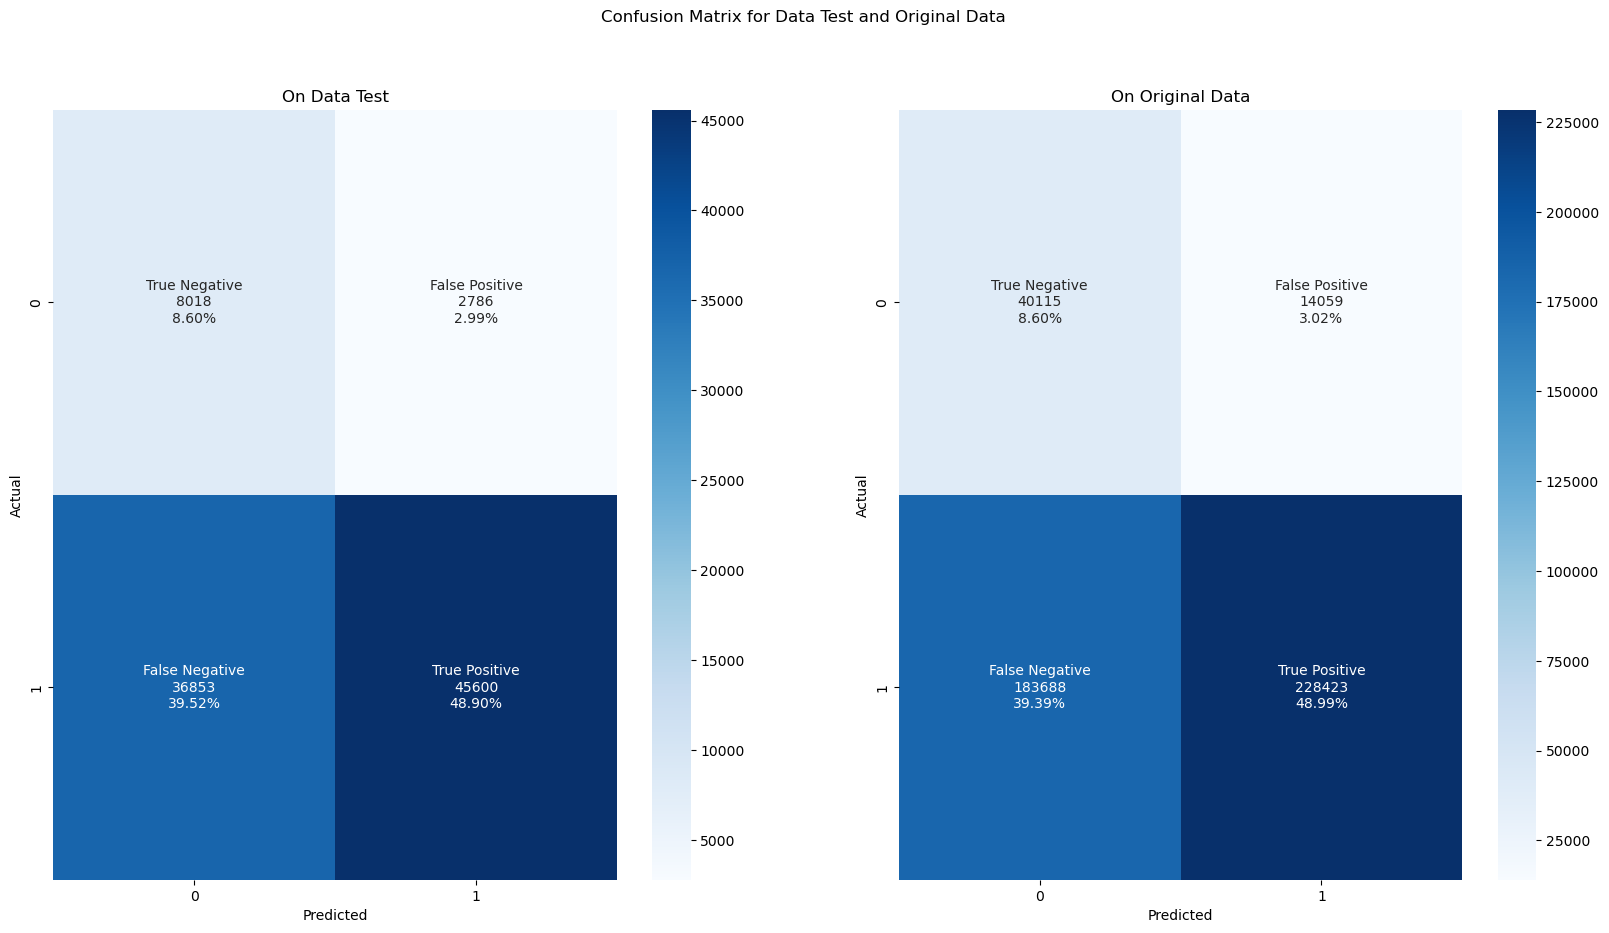

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute first confusion matrix
y_test_pred_xg1 = log_tuned.predict(X_test)
cf_matrix1 = confusion_matrix(y_test, y_test_pred_xg1)

# Compute second confusion matrix
y_test_pred_xg2 = log_tuned.predict(X)
cf_matrix2 = confusion_matrix(y, y_test_pred_xg2)

# Define labels for confusion matrices
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts1 = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)

group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot first confusion matrix
sns.heatmap(cf_matrix1, annot=labels1, fmt='', cmap='Blues', ax=axs[0])
axs[0].set_title('On Data Test')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Plot second confusion matrix
sns.heatmap(cf_matrix2, annot=labels2, fmt='', cmap='Blues', ax=axs[1])
axs[1].set_title('On Original Data')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# Add title for the whole plot
plt.suptitle('Confusion Matrix for Data Test and Original Data')

# Show the plot
plt.show()

After we do hyperparameter tuning, now let's see on the positive values again. Now we have predicted 5,76% good loan that actually bad loan, and we have predicted **94,24%** good loan that actually good loan on data test. <br>

On original data, we have predicted `5,8%` good loan that actually bad loan, and we have predicted `94,2%` good loan that actually good loan.

### Feature Importance

In [278]:
def show_feature_importance(model):
    best_model = model.best_estimator_
    coefficients = best_model.coef_[0]
    feat_importances = pd.Series(abs(coefficients), index=X.columns)
    ax = feat_importances.nlargest(25).sort_values(ascending=True)
    # ax.invert_yaxis()

    plt.figure(figsize=(10, 8))
    ax.plot(kind='barh')
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

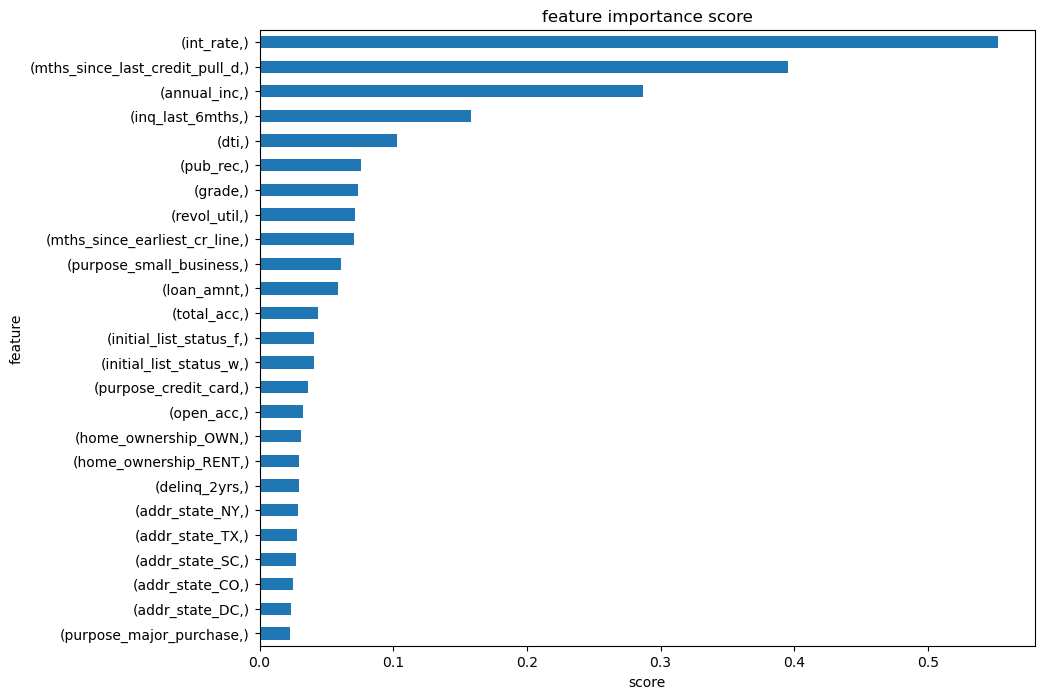

In [279]:
show_feature_importance(log_tuned)

We can see that the top 3 most importance features are `int_rate`, `mths_since_last_credit_oull_d` and `annual_inc`.

# Conclusion and Suggestion

After doing hyperparameter tuning, we have better score for positive values. It means that we predicted better on the dataset. In the end we can predict with **94,2% accuracy** on the good loan or good borrowers. <br>

For the suggestion to get better score again, and to reduce the predicted bad loan that are actually good loan, we need to: <br>
- **Data preprocessing.** Pay more attention to the data preprocessing, including how to fill the missing values, consider to take the outliers or not, etc.
- **Feature Selection.** This is important, because our model data is from selected features. Consider to make decision whether the feature is importance or not. Do more exploration on the data, and pay attention on the detail values. We can try to use Weight of Evidence (WoE) and Information Value (IV), to get more detail of the data.
- **Modeling.** Try more model algorithm, try more hyperparameter tuning, consider the scoring, etc.